# Session 05

## Decision Trees


In [1]:
# import statements
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits, load_iris, make_blobs,load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


import graphviz


import matplotlib.image as mpimg




In [2]:

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

TEST_SIZE = 0.2

# pip install graphviz

In [3]:
decision_tree = graphviz.Digraph(node_attr={'shape':'box'},
                                 edge_attr={'labeldistance':'10.5'},
                                 format = 'png')
decision_tree.node("0",'Has Feathers?')
decision_tree.node("1",'Can Fly?')
decision_tree.node("2",'Fins?')
decision_tree.node("3",'Hawk?')
decision_tree.node("4",'Penguin?')
decision_tree.node("5",'Dolphin?')
decision_tree.node("6",'Bear?')

decision_tree.edge("0","1", label = "True")
decision_tree.edge("0","2", label = "False")

decision_tree.edge("1","3", label = "True")
decision_tree.edge("1","4", label = "False")

decision_tree.edge("2","5", label = "True")
decision_tree.edge("2","6", label = "False")

decision_tree.render('decision_tree')



'decision_tree.png'

In [4]:
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state = RANDOM_STATE, test_size = TEST_SIZE, stratify = data.target)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [6]:
tree = DecisionTreeClassifier(random_state = RANDOM_STATE)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

accuracy_score(y_test, y_pred)

0.8947368421052632

In [8]:
y_pred = tree.predict(X_train)
accuracy_score(y_train, y_pred)

1.0

In [25]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = RANDOM_STATE)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_train)

print('Train', accuracy_score(y_train, y_pred))

y_pred = tree.predict(X_test)

print('Test', accuracy_score(y_test, y_pred))


Train 0.9846153846153847
Test 0.8771929824561403


In [26]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [27]:
export_graphviz(tree, out_file = 'tree.dot', impurity = False, filled = True,
                class_names = data.target_names, 
                feature_names = data.feature_names)

In [31]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
img = graphviz.Source(dot_graph)
!dot -Tpng tree.dot -o tree.png

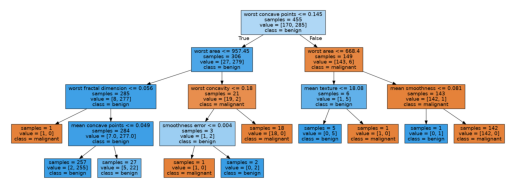

In [34]:
plt.imshow(mpimg.imread('tree.png'))
plt.axis('off');